# 时间序列

In [1]:
import pandas as pd
import numpy as np

pd.date_range(start="20190101", end="20190201")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [2]:
pd.date_range(start="20240411",periods=10,freq='B')

DatetimeIndex(['2024-04-11', '2024-04-12', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24'],
              dtype='datetime64[ns]', freq='B')

In [3]:
pd.date_range(start="20190101",periods=10,freq='M')

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')

In [4]:
pd.date_range(start="20190101",periods=10,freq='MS')

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [5]:
pd.date_range(start="20230710",periods=10,freq='W')  #拿每周的周日生成

DatetimeIndex(['2023-07-16', '2023-07-23', '2023-07-30', '2023-08-06',
               '2023-08-13', '2023-08-20', '2023-08-27', '2023-09-03',
               '2023-09-10', '2023-09-17'],
              dtype='datetime64[ns]', freq='W-SUN')

In [6]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 2)
print(s)

0    3/11/2000
1    3/12/2000
2    3/13/2000
3    3/11/2000
4    3/12/2000
5    3/13/2000
dtype: object


In [7]:
#timeit可以统计执行耗时，to_datetime把字符串转为时间格式
pd.to_datetime(s, infer_datetime_format=True)

C:\Users\Lxxl\AppData\Local\Temp\ipykernel_16588\845727718.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  pd.to_datetime(s, infer_datetime_format=True)


0   2000-03-11
1   2000-03-12
2   2000-03-13
3   2000-03-11
4   2000-03-12
5   2000-03-13
dtype: datetime64[ns]

# 911数据
### 三类事件：EMS、Fire、Traffic，统计这三类事件在每月发生的次数，画出随时间变化的折线图
### 把字符串时间变为时间戳，画图时再把时间戳变为字符串

In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# 把时间字符串转为时间类型设置为索引
df = pd.read_csv("./911.csv")
print(df["timeStamp"].dtype)
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
print(df["timeStamp"].dtype)

df.head()

object
datetime64[ns]


lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

In [ ]:
# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist() # 二维列表
# .str.split()是一个Pandas库提供的方法，用于对Series对象进行字符串分割操作，并将结果存储为一个列表
# .str.split(": ")对"title"列中的每个元素使用冒号和空格": "作为分隔符进行分割。
# 这意味着，如果"title"列中的某个元素是"Emergency: Fire"，那么分割后得到的列表将是["Emergency", "Fire"]

cate_list = [i[0] for i in temp_list] # i[0]就是EMS  Fire  Traffic
# print(np.array(cate_list).reshape((df.shape[0], 1)))

# 添加一列
df["cate"] = pd.DataFrame(np.array(cate_list).reshape(df.shape[0], 1))

df.set_index("timeStamp", inplace=True) #设置索引，时间戳，inplace=True表示在原df上修改

In [3]:
df.head()

lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   
2015-12-10 17:29:21  40.258061 -75.264680   
2015-12-10 14:39:21  40.121182 -75.351975   
2015-12-10 16:47:36  40.116153 -75.343513   
2015-12-10 16:56:52  40.251492 -75.603350   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2015-12-10 14:39:21  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
2015-12-10 16:47:36  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
2015-12-10 16:56:52  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

                         zip                    title                twp  \
timeStamp                                                                  
2015-12-10 17:10:52  19525.0   EMS: BACK PAINS/INJURY        NEW HANOVER   
2015-12-10 17:29:21  19446.0  EMS: DIABETIC EMERGENCY  HATFIELD TOWNSHIP   
2015-12-10 14:39:21  19401.0      Fire: GAS-ODOR/LEAK         NORRISTOWN   
2015-12-10 16:47:36  19401.0   EMS: CARDIAC EMERGENCY         NORRISTOWN   
2015-12-10 16:56:52      NaN           EMS: DIZZINESS   LOWER POTTSGROVE   

                                           addr  e  cate  
timeStamp                                                 
2015-12-10 17:10:52      REINDEER CT & DEAD END  1   EMS  
2015-12-10 17:29:21  BRIAR PATH & WHITEMARSH LN  1   EMS  
2015-12-10 14:39:21                    HAWS AVE  1  Fire  
2015-12-10 16:47:36          AIRY ST & SWEDE ST  1   EMS  
2015-12-10 16:56:52    CHERRYWOOD CT & DEAD END  1   EMS

timeStamp
2015-12-31    3898
2016-01-31    6063
2016-02-29    5413
2016-03-31    5832
2016-04-30    5684
2016-05-31    5730
2016-06-30    5720
2016-07-31    6029
2016-08-31    6005
2016-09-30    5750
2016-10-31    6039
2016-11-30    5838
2016-12-31    6024
2017-01-31    6082
2017-02-28    5417
2017-03-31    5913
2017-04-30    5780
2017-05-31    5948
2017-06-30    6030
2017-07-31    5974
2017-08-31    5882
2017-09-30    3789
Freq: M, Name: title, dtype: int64
----------------------------------------------------------------------------------------------------
DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30',
               '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31',
               '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30'],
              dtype='datetime64[ns]',

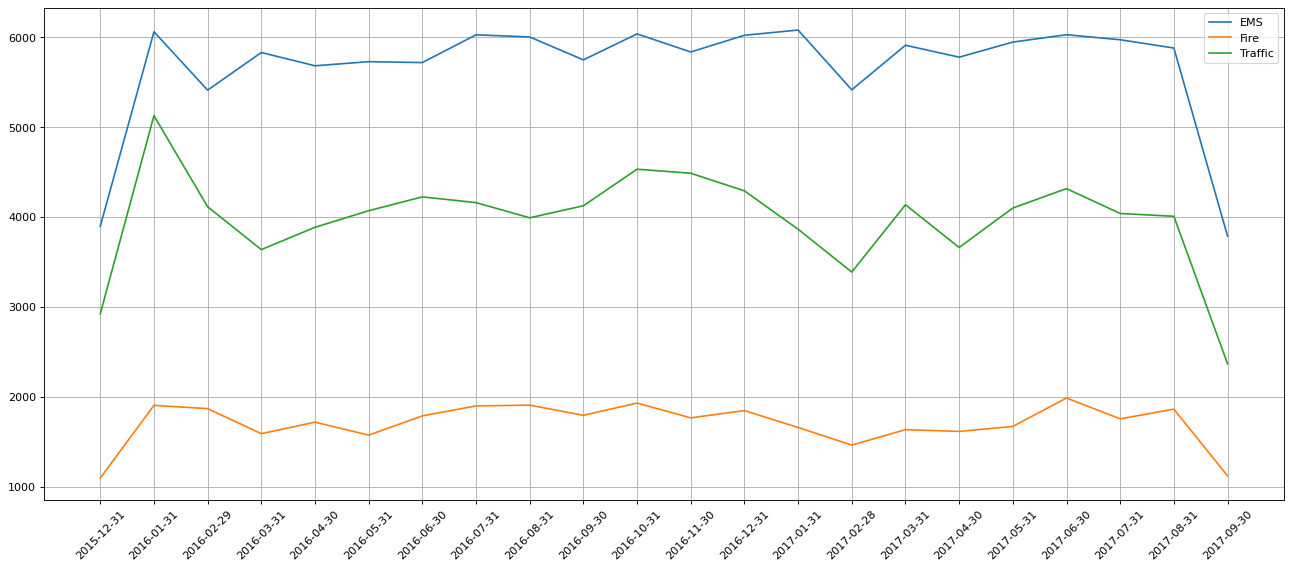

In [2]:
plt.figure(figsize=(20, 8), dpi=80)

# 分组,一图多线
# resample降采样，按月统计,索引必须是时间类型，类似groupby
for group_name, group_data in df.groupby(by="cate"):

    # 在时间序列数据中，降采样通常用于将数据从较细的时间粒度（如分钟、小时）聚合到较粗的时间粒度（如天、月、年）
    # 相当于对样本进行了时间上的分组，这里跨度是M，返回一个分组对象
    # resample方法只适用于DatetimeIndex类型的行索引。
    # 如果行索引不是时间戳类型，即使列中有时间戳类型的数据，resample方法也不会生效，
    # 因为Pandas无法识别非时间戳类型的索引来进行时间序列的降采样操作。
    count_by_month = group_data.resample("M").count()["title"]  # 降采样
    #print(group_data.resample("M").count())
    print(count_by_month)   # Series
    print("--"*50)

    # 画图
    _x = count_by_month.index # x轴就是时间
    print(_x)
    print("=="*50)

    _x = [i.strftime("%Y-%m-%d") for i in _x]
    # strftime("%Y%m%d")是一个将时间戳（或 datetime 对象）转换为指定格式的字符串的方法。
    # %Y 代表四位数的年份，%m 代表月份（01到12），%d 代表月份中的一天（01到31）。
    # 因此，"%Y-%m-%d" 将时间戳格式化为 "年-月-日" 的字符串形式，例如 2021-03-01 代表 2021 年 3 月 1 日
    print(_x)   # str类型
    print("++"*50)

    _y = count_by_month.values # y轴就是对应事故发生次数，即values
    plt.plot(_x, _y, label=group_name)

plt.xticks(range(len(_x)), _x, rotation=45)
plt.grid()
plt.legend(loc="best")  # 自动选择最佳的图例位置，以避免覆盖图表中的重要部分
plt.show()

# pm2.5
### 有两个部门，画出这两个区域的pm2.5值随星期的变化折线图
### 把整数的时间变为时间戳

In [1]:
import pandas as pd
file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
# print(df.head(10))

# 把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"], month=df["month"], day=df["day"],
                        hour=df["hour"], freq="H")
print(period)
print(type(period)) # <class 'pandas.core.indexes.period.PeriodIndex'>
print("-"*50)

df["datetime"] = period
#print(df.head(10))
print(df.dtypes)

# 把datetime 设置为行索引
df.set_index("datetime", inplace=True)

PeriodIndex(['2010-01-01 00:00', '2010-01-01 01:00', '2010-01-01 02:00',
             '2010-01-01 03:00', '2010-01-01 04:00', '2010-01-01 05:00',
             '2010-01-01 06:00', '2010-01-01 07:00', '2010-01-01 08:00',
             '2010-01-01 09:00',
             ...
             '2015-12-31 14:00', '2015-12-31 15:00', '2015-12-31 16:00',
             '2015-12-31 17:00', '2015-12-31 18:00', '2015-12-31 19:00',
             '2015-12-31 20:00', '2015-12-31 21:00', '2015-12-31 22:00',
             '2015-12-31 23:00'],
            dtype='period[H]', length=52584)
<class 'pandas.core.indexes.period.PeriodIndex'>
--------------------------------------------------
No                     int64
year                   int64
month                  int64
day                    int64
hour                   int64
season                 int64
PM_Dongsi            float64
PM_Dongsihuan        float64
PM_Nongzhanguan      float64
PM_US Post           float64
DEWP                 float64
HUMI          

In [6]:
print(df.head(3))
print("-"*50)

# 进行降采样，行索引必须是pd的时间类型DatetimeIndex，
# 这里行索引中的类型是period[H]，要先转为 datetime64[ns]
print(df.index.dtype)

df.index = pd.DatetimeIndex(df.index.to_timestamp())

                  No  year  month  day  hour  season  PM_Dongsi  \
datetime                                                          
2010-01-01 00:00   1  2010      1    1     0       4        NaN   
2010-01-01 01:00   2  2010      1    1     1       4        NaN   
2010-01-01 02:00   3  2010      1    1     2       4        NaN   

                  PM_Dongsihuan  PM_Nongzhanguan  PM_US Post  DEWP  HUMI  \
datetime                                                                   
2010-01-01 00:00            NaN              NaN         NaN -21.0  43.0   
2010-01-01 01:00            NaN              NaN         NaN -21.0  47.0   
2010-01-01 02:00            NaN              NaN         NaN -21.0  43.0   

                    PRES  TEMP cbwd   Iws  precipitation  Iprec  
datetime                                                         
2010-01-01 00:00  1021.0 -11.0   NW  1.79            0.0    0.0  
2010-01-01 01:00  1020.0 -12.0   NW  4.92            0.0    0.0  
2010-01-01 02:00  1

In [10]:
df.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2015-12-31 14:00:00', '2015-12-31 15:00:00',
               '2015-12-31 16:00:00', '2015-12-31 17:00:00',
               '2015-12-31 18:00:00', '2015-12-31 19:00:00',
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=52584, freq='H')

In [9]:
df.head(3)

No  year  month  day  hour  season  PM_Dongsi  \
datetime                                                             
2010-01-01 00:00:00   1  2010      1    1     0       4        NaN   
2010-01-01 01:00:00   2  2010      1    1     1       4        NaN   
2010-01-01 02:00:00   3  2010      1    1     2       4        NaN   

                     PM_Dongsihuan  PM_Nongzhanguan  PM_US Post  DEWP  HUMI  \
datetime                                                                      
2010-01-01 00:00:00            NaN              NaN         NaN -21.0  43.0   
2010-01-01 01:00:00            NaN              NaN         NaN -21.0  47.0   
2010-01-01 02:00:00            NaN              NaN         NaN -21.0  43.0   

                       PRES  TEMP cbwd   Iws  precipitation  Iprec  
datetime                                                            
2010-01-01 00:00:00  1021.0 -11.0   NW  1.79            0.0    0.0  
2010-01-01 01:00:00  1020.0 -12.0   NW  4.92            0.0    0.0  
2010-01-01 02:00:00  1019.0 -11.0   NW  6.71            0.0    0.0

### 每7天为一组，组名为这七天的第一天

In [42]:
for i in df.loc[:,["PM_US Post","PM_Nongzhanguan"]].resample("7D"):
    print(i[0])
    print(i[1])
    print("--"*50)

2010-01-01 00:00:00
                     PM_US Post  PM_Nongzhanguan
datetime                                        
2010-01-01 00:00:00         NaN              NaN
2010-01-01 01:00:00         NaN              NaN
2010-01-01 02:00:00         NaN              NaN
2010-01-01 03:00:00         NaN              NaN
2010-01-01 04:00:00         NaN              NaN
...                         ...              ...
2010-01-07 19:00:00       106.0              NaN
2010-01-07 20:00:00       159.0              NaN
2010-01-07 21:00:00       198.0              NaN
2010-01-07 22:00:00       190.0              NaN
2010-01-07 23:00:00       210.0              NaN

[168 rows x 2 columns]
----------------------------------------------------------------------------------------------------
2010-01-08 00:00:00
                     PM_US Post  PM_Nongzhanguan
datetime                                        
2010-01-08 00:00:00       195.0              NaN
2010-01-08 01:00:00       275.0              NaN
20

### 取出要统计的两列，按7天分组，取平均值

In [17]:
df.loc[:,["PM_US Post","PM_Nongzhanguan"]].resample("7D").mean()

PM_US Post  PM_Nongzhanguan
datetime                               
2010-01-01   71.627586              NaN
2010-01-08   69.910714              NaN
2010-01-15  163.654762              NaN
2010-01-22   68.069307              NaN
2010-01-29   53.583333              NaN
...                ...              ...
2015-11-27  242.642857       246.585366
2015-12-04  145.437500       155.072289
2015-12-11   88.750000        90.367470
2015-12-18  204.139241       201.128049
2015-12-25  209.244048       199.566265

[313 rows x 2 columns]

### 只要该样本有一列为空，则丢弃该样本
### 即只要该天有一个区域没有pm2.5值，则丢弃该天的数据

In [16]:
df.loc[:,["PM_US Post","PM_Nongzhanguan"]].resample("7D").mean().dropna()

PM_US Post  PM_Nongzhanguan
datetime                               
2013-01-11  277.731707        65.333333
2013-01-18  188.244048       161.054217
2013-01-25  261.263473       224.006098
2013-02-01   72.845238        61.145570
2013-02-08  125.832335       110.478788
...                ...              ...
2015-11-27  242.642857       246.585366
2015-12-04  145.437500       155.072289
2015-12-11   88.750000        90.367470
2015-12-18  204.139241       201.128049
2015-12-25  209.244048       199.566265

[155 rows x 2 columns]

In [19]:
df1 = df.loc[:,["PM_US Post","PM_Nongzhanguan"]].resample("7D").mean().dropna()
df1

PM_US Post  PM_Nongzhanguan
datetime                               
2013-01-11  277.731707        65.333333
2013-01-18  188.244048       161.054217
2013-01-25  261.263473       224.006098
2013-02-01   72.845238        61.145570
2013-02-08  125.832335       110.478788
...                ...              ...
2015-11-27  242.642857       246.585366
2015-12-04  145.437500       155.072289
2015-12-11   88.750000        90.367470
2015-12-18  204.139241       201.128049
2015-12-25  209.244048       199.566265

[155 rows x 2 columns]

In [22]:
data_usa = df1.loc[:,"PM_US Post"]
data_usa

datetime
2013-01-11    277.731707
2013-01-18    188.244048
2013-01-25    261.263473
2013-02-01     72.845238
2013-02-08    125.832335
                 ...    
2015-11-27    242.642857
2015-12-04    145.437500
2015-12-11     88.750000
2015-12-18    204.139241
2015-12-25    209.244048
Freq: 7D, Name: PM_US Post, Length: 155, dtype: float64

In [24]:
data_china = df1.loc[:,"PM_Nongzhanguan"]
data_china

datetime
2013-01-11     65.333333
2013-01-18    161.054217
2013-01-25    224.006098
2013-02-01     61.145570
2013-02-08    110.478788
                 ...    
2015-11-27    246.585366
2015-12-04    155.072289
2015-12-11     90.367470
2015-12-18    201.128049
2015-12-25    199.566265
Freq: 7D, Name: PM_Nongzhanguan, Length: 155, dtype: float64

In [29]:
print(data_usa.info())
print("=="*50)

print(data_china.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 155 entries, 2013-01-11 to 2015-12-25
Freq: 7D
Series name: PM_US Post
Non-Null Count  Dtype  
--------------  -----  
155 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB
None
<class 'pandas.core.series.Series'>
DatetimeIndex: 155 entries, 2013-01-11 to 2015-12-25
Freq: 7D
Series name: PM_Nongzhanguan
Non-Null Count  Dtype  
--------------  -----  
155 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB
None


In [37]:
_x_china = data_china.index
print(_x_china)
print("--"*50)

_x_china = [i.strftime("%Y-%m-%d") for i in _x_china]
print(_x_china)

print(len(_x_china),len(data_china))

_x_usa = data_usa.index
print(_x_usa)
print("--"*50)

_x_usa = [i.strftime("%Y-%m-%d") for i in _x_usa]

DatetimeIndex(['2013-01-11', '2013-01-18', '2013-01-25', '2013-02-01',
               '2013-02-08', '2013-02-15', '2013-02-22', '2013-03-01',
               '2013-03-08', '2013-03-15',
               ...
               '2015-10-23', '2015-10-30', '2015-11-06', '2015-11-13',
               '2015-11-20', '2015-11-27', '2015-12-04', '2015-12-11',
               '2015-12-18', '2015-12-25'],
              dtype='datetime64[ns]', name='datetime', length=155, freq='7D')
----------------------------------------------------------------------------------------------------
['2013-01-11', '2013-01-18', '2013-01-25', '2013-02-01', '2013-02-08', '2013-02-15', '2013-02-22', '2013-03-01', '2013-03-08', '2013-03-15', '2013-03-22', '2013-03-29', '2013-04-05', '2013-04-12', '2013-04-19', '2013-04-26', '2013-05-03', '2013-05-10', '2013-05-17', '2013-05-24', '2013-05-31', '2013-06-07', '2013-06-14', '2013-06-21', '2013-06-28', '2013-07-05', '2013-07-12', '2013-07-19', '2013-07-26', '2013-08-02', '2013-08-0

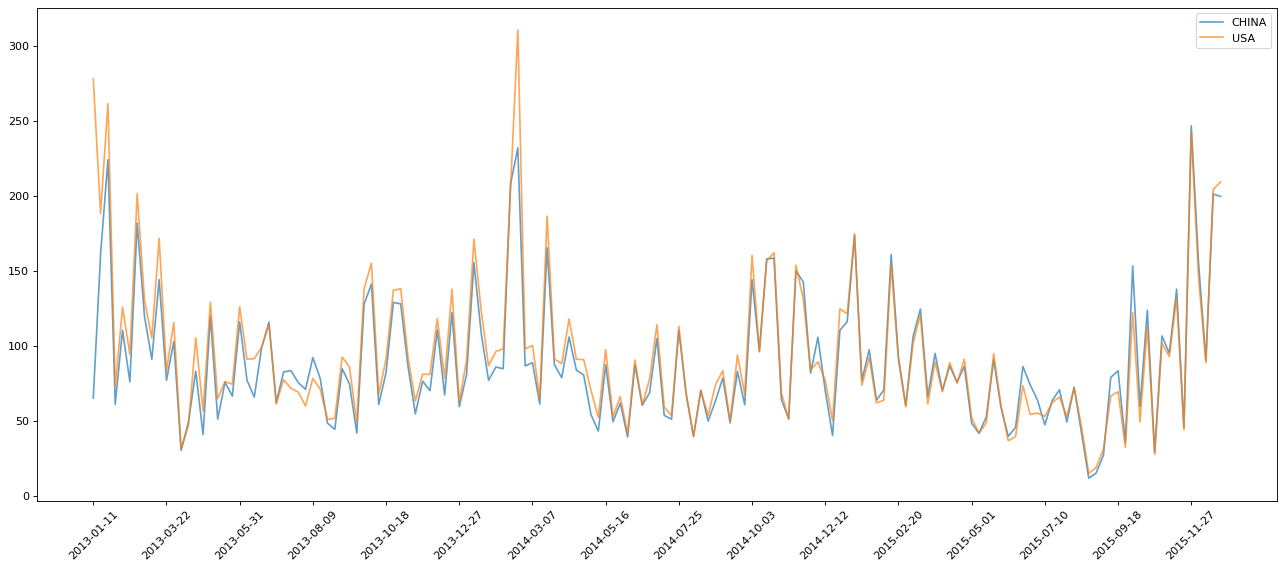

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8),dpi = 80)

_y_usa = data_usa.values
_y_china = data_china.values

plt.plot(range(len(_x_china)), _y_china, label = "CHINA", alpha = 0.7)
plt.plot(range(len(_x_usa)), _y_usa, label = "USA", alpha = 0.7)

# 每10个刻度打一个标签，即每10周
plt.xticks(range(0, len(_x_china), 10), _x_china[::10], rotation=45)

plt.legend(loc="best")
plt.show()